In [12]:
from oceantracker.post_processing.read_output_files.load_output_files import load_grid
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from copy import deepcopy
# import xarray as xr

In [2]:
# path to model runInfo
path_to_dir = '/scratch/local1/output/22_12_08_retention_v25/22_12_08_retention_v25_C001_caseInfo.json'

# get grid
grid = load_grid(path_to_dir)

In [9]:
# iterate over all time steps and calculate average salinity

# get files in schism dir

files = sorted(glob.glob(os.path.join('/scratch/local1/hzg3', 'schout_*.nc')))

In [50]:
salt.shape

(24, 32432, 21)

In [13]:
for ii,file in enumerate(files):
    df = nc.Dataset(file)
    salt = df.variables['salt']
    
    daily_depth_averaged_salt = salt[:,:,:].mean(axis=(0,2))

    if ii == 0:
        yearly_depth_averaged_salt = deepcopy(daily_depth_averaged_salt)
    elif ii > 0:
        yearly_depth_averaged_salt = np.mean([yearly_depth_averaged_salt, daily_depth_averaged_salt], axis=0)
    
    if ii % 28 == 0:
        print(ii)

# pickle results
import pickle
with open('yearly_depth_averaged_salt.pickle', 'wb') as f:
    pickle.dump(yearly_depth_averaged_salt, f)


0
28
56
84
112
140
168
196
224
252
280
308
336
364


/tmp/ipykernel_1063/755987134.py:3: UserWarning: The following kwargs were not used by contour: 'triangles'
  plt.tricontour(grid['x'][:,0], grid['x'][:,1], yearly_depth_averaged_salt, triangles=grid['triangles'], levels=10,vmax=30)


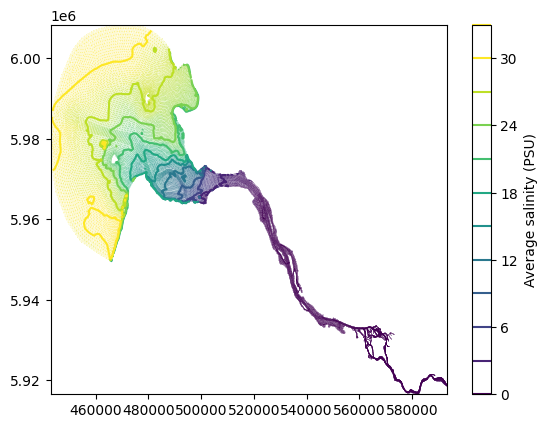

In [14]:
plt.tripcolor(grid['x'][:,0], grid['x'][:,1], yearly_depth_averaged_salt, triangles=grid['triangles'],vmax=30,alpha=0.1)
# plt.tricontourf(grid['x'][:,0], grid['x'][:,1], yearly_depth_averaged_salt, triangles=grid['triangles'])
plt.tricontour(grid['x'][:,0], grid['x'][:,1], yearly_depth_averaged_salt, triangles=grid['triangles'], levels=10,vmax=30)
# add cbar wit label
plt.colorbar(label='Average salinity (PSU)')

In [15]:
def rotate_points(x, y, angle, point):

    x_rotated = (x - point[0]) * np.cos(angle) - (y - point[1]) * np.sin(angle) + point[0]
    y_rotated = (x - point[0]) * np.sin(angle) + (y - point[1]) * np.cos(angle) + point[1]

    return x_rotated, y_rotated

In [16]:
x = grid['x'][:,0]
y = grid['x'][:,1]

x_rotated, y_rotated = rotate_points(x, y, 32 * np.pi / 180, [5.489e5,5.9312e6])

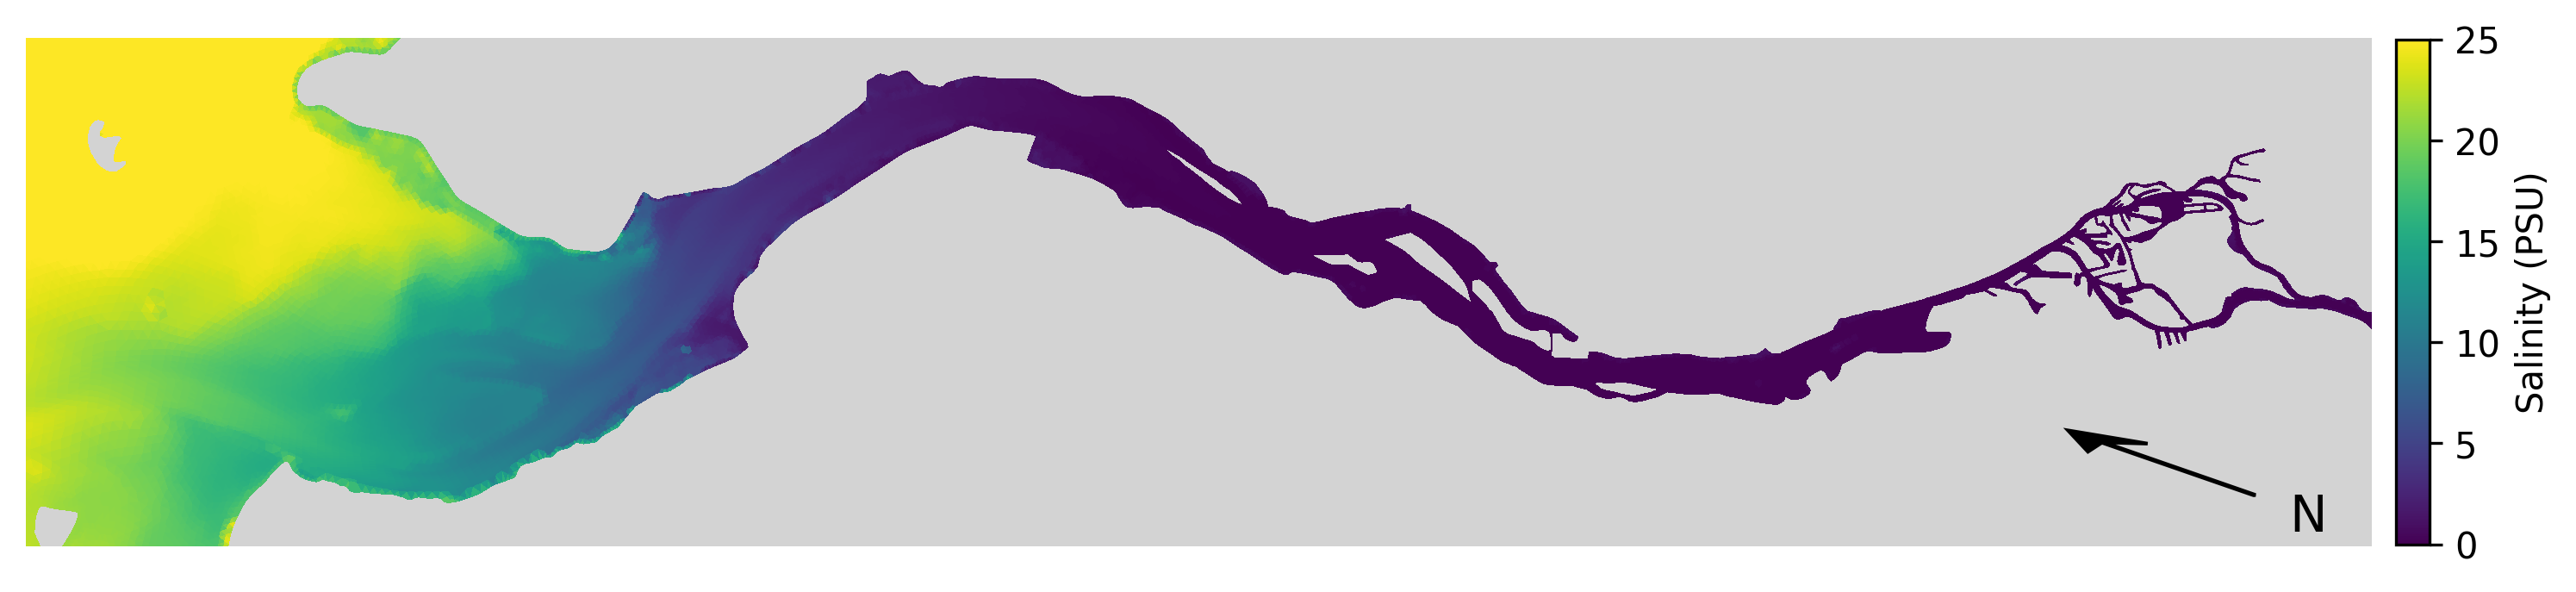

In [17]:
xlim = [4.55e5, 5.75e5]
ylim = [5.924e6, 5.950e6]

aspect_ratio = (np.max(x) - np.min(x)) / (np.max(y) - np.min(y))

# 12cm in width
fig,ax = plt.subplots(figsize=(12 , 12/(aspect_ratio*0.85)), dpi=300)
ax.set_facecolor('lightgray')


# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_xlim(xlim)
ax.set_ylim(ylim)


tc = ax.tripcolor(x_rotated, y_rotated, yearly_depth_averaged_salt, triangles=grid['triangles'],vmax=25,alpha=1,zorder=3)
# add a single contour line at 20 PSU
# c = ax.tricontour(x_rotated, y_rotated, yearly_depth_averaged_salt, triangles=grid['triangles'], levels=1,zorder=3,colors='k',linewidths=1)

# add cbar wit label
cb = fig.colorbar(tc, ax=ax, label='Salinity (PSU)', pad=0.01, shrink=1, fraction=0.014,aspect=15)# aspect=1/aspect_ratio)

# add an arrow pointing 32 degree north in the top center
arrow_pos = [0.95, 0.1]
ax.arrow(arrow_pos[0],arrow_pos[1], -np.sin(32 * np.pi / 180)*0.15, np.cos(32 * np.pi / 180)*0.15, 
         transform=ax.transAxes, length_includes_head=True, overhang=0.3,
         head_width=0.03, head_length=0.04, color='k', zorder=4)

# add N to arrow
ax.text(arrow_pos[0]+0.015,arrow_pos[1]-0.07, 'N', transform=ax.transAxes, fontsize=14, zorder=4)


# fix aspect ratio
ax.set_aspect('equal', 'box')

# save figure
fig.savefig('salinity.svg', bbox_inches='tight')

In [156]:
# get levels of contour lines
c.levels

array([ 0., 20., 40.])

In [18]:
daily_depth_averaged_salt.shape

(32432,)